In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar para ver todos los datos
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)  # puedes poner None para sin límite

# Leer el csv
df = pd.read_csv('bank-additional-full.csv',  sep=";", quotechar='"')

### 1. Importación de librerías y entendimiento del negocio

In [4]:
# Bloque 1: Librerías y visión general del dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE

# Mostrar todas las columnas del dataset
pd.set_option('display.max_columns', None)

# Ver primeras filas
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 2. Exploración de los datos

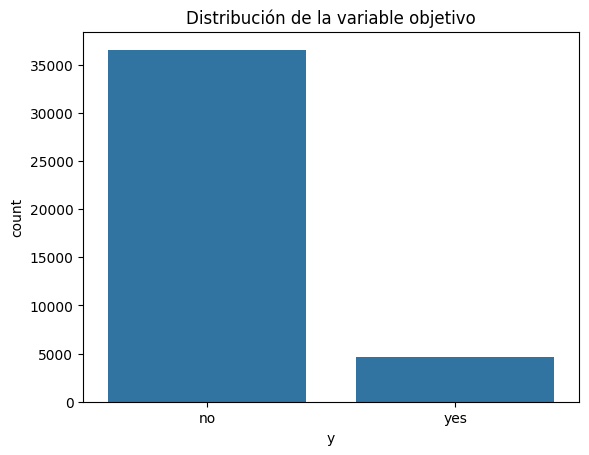

In [7]:
# Bloque 2: Análisis exploratorio

# Resumen estadístico de variables numéricas
df.describe()

# Resumen de variables categóricas
df.describe(include=['object'])

# Distribución de la variable objetivo
sns.countplot(x='y', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()

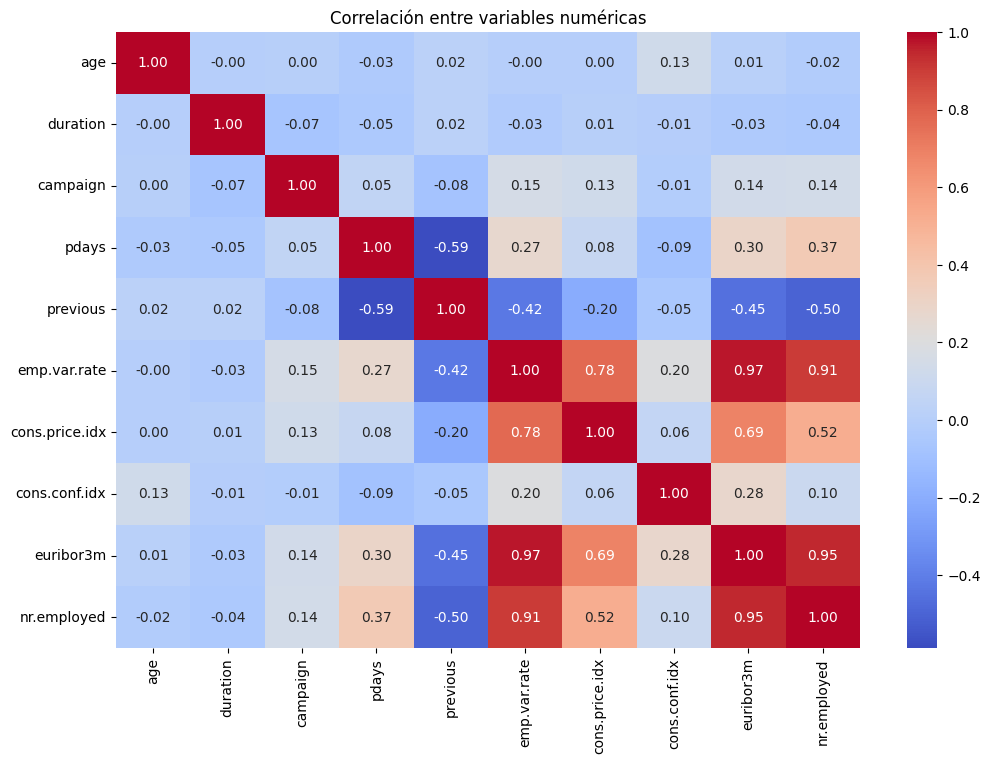

In [8]:

# Matriz de correlación para variables numéricas
df_num = df[['age',	'duration',	'campaign',	'pdays',	'previous',	'emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m',	'nr.employed']]
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

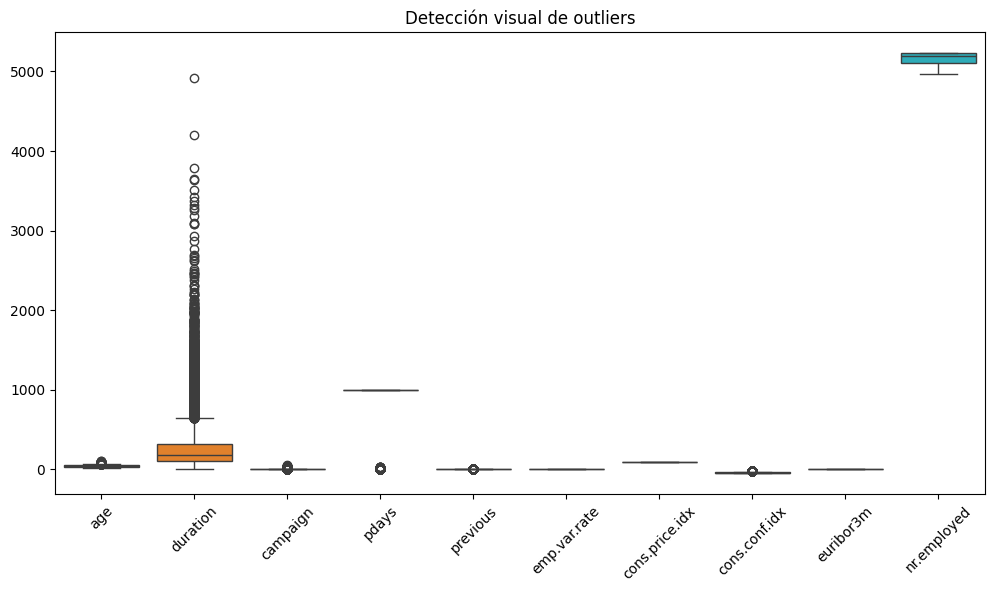

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_num)
plt.xticks(rotation=45)
plt.title('Detección visual de outliers')
plt.show()

### 3. Procesamiento de los datos

In [10]:
# Bloque 3: Preprocesamiento

# Separar features y target
X = df.drop(['y', 'duration'], axis=1)
y = df['y'].apply(lambda x: 1 if x=='yes' else 0)  # convertir a binario

# Columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

# Pipeline para variables numéricas
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # rellenar NaNs
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Aplicar preprocesamiento
X_processed = preprocessor.fit_transform(X)

### 4. Balanceo de clases

In [11]:
# Bloque 4: Balanceo de clases con SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_processed, y)

# Revisar nuevas proporciones
print(pd.Series(y_res).value_counts())

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

y
0    36548
1    36548
Name: count, dtype: int64


### 5. Reducción de dimensionalidad

In [12]:
# Bloque 5: PCA para reducción de dimensionalidad
pca = PCA(n_components=0.95, random_state=42)  # conservar 95% de varianza
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'Número de componentes retenidos: {pca.n_components_}')

Número de componentes retenidos: 25


### 6. Random Forest

Reporte de clasificación - Random Forest
              precision    recall  f1-score   support

          No       0.93      0.91      0.92      7310
         Yes       0.91      0.93      0.92      7310

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



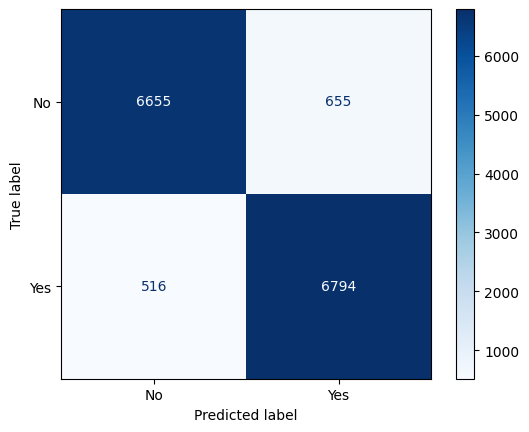

In [13]:
# Bloque 6: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train_pca, y_train)

y_pred_rf = rf.predict(X_test_pca)

print("Reporte de clasificación - Random Forest")
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Yes']))

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(rf, X_test_pca, y_test, display_labels=['No','Yes'], cmap='Blues')
plt.show()

Validación cruzada para Random Forest

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Creamos el modelo (igual que antes)
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# Estratificamos en 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada para recall en la clase 1
recall_scores = cross_val_score(rf, X_res, y_res, cv=cv, scoring='recall')

print("Recall en cada fold:", recall_scores)
print("Recall promedio:", recall_scores.mean())

Recall en cada fold: [0.93392613 0.93583254 0.93159119 0.93611491 0.9370725 ]
Recall promedio: 0.9349074534534658


### 7. Logistic Regression

Reporte de clasificación - Logistic Regression
              precision    recall  f1-score   support

          No       0.71      0.83      0.77      7310
         Yes       0.80      0.66      0.72      7310

    accuracy                           0.74     14620
   macro avg       0.75      0.74      0.74     14620
weighted avg       0.75      0.74      0.74     14620



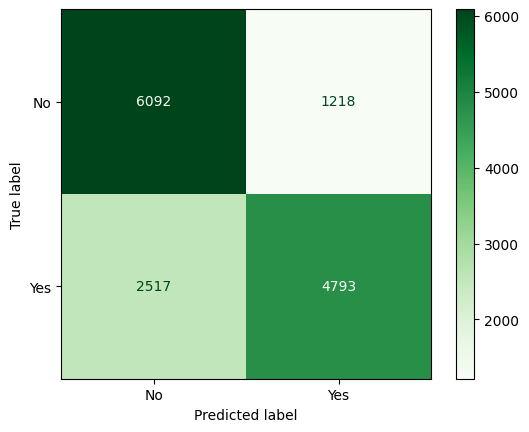

In [15]:
# Bloque 7: Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train_pca, y_train)

y_pred_lr = lr.predict(X_test_pca)

print("Reporte de clasificación - Logistic Regression")
print(classification_report(y_test, y_pred_lr, target_names=['No', 'Yes']))

ConfusionMatrixDisplay.from_estimator(lr, X_test_pca, y_test, display_labels=['No','Yes'], cmap='Greens')
plt.show()

Validación cruzada para Logistic Regression

In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Modelo de regresión logística
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Estratificamos en 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada para recall en clase 1
recall_scores_lr = cross_val_score(lr, X_res, y_res, cv=cv, scoring='recall')

print("Recall en cada fold (Logistic Regression):", recall_scores_lr)
print("Recall promedio:", recall_scores_lr.mean())

Recall en cada fold (Logistic Regression): [0.63652531 0.62908743 0.64454782 0.64391245 0.64883721]
Recall promedio: 0.6405820420039458
